In [178]:
# using data from https://github.com/zhanglabNKU/APIN/blob/master/data/alldata

import Bio
import numpy as np
import matplotlib.pyplot as plt

In [179]:
seqs=[]

from Bio import SeqIO
for sequence in SeqIO.parse('alldata.fa.txt', "fasta"):
    seqs.append(sequence.seq)

In [180]:
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']


def one_hot_encode(seq):
    o = list(set(codes) - set(seq))
    s = pd.DataFrame(list(seq))    
    x = pd.DataFrame(np.zeros((len(seq),len(o)),dtype=int),columns=o)    
    a = s[0].str.get_dummies(sep=',')
    a = a.join(x)
    a = a.sort_index(axis=1)
    e = a.values.flatten()
    return e

In [181]:
import tensorflow
import pandas as pd
one_hot_seqs=[one_hot_encode(i) for i in seqs]
padded_seqs=tensorflow.keras.preprocessing.sequence.pad_sequences(one_hot_seqs,value=0.0)
X=padded_seqs

In [182]:
import sklearn
from sklearn.decomposition import PCA

PCA = PCA(n_components=2)
PCA.fit(X)
PCA_X = PCA.transform(X)

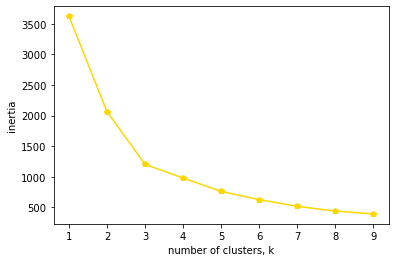

In [183]:
#Elbo method for selecting optimal number of clusters

from sklearn.cluster import KMeans
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k,       )
    
    # Fit model to samples
    model.fit(PCA_X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

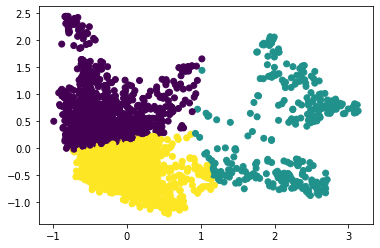

In [186]:
from sklearn.cluster import KMeans


model = KMeans(n_clusters=3)
model.fit(PCA_X)

labels = model.predict(PCA_X)
plt.scatter(PCA_X.T[0], PCA_X.T[1], c=labels)
plt.show()
